In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import gdown
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import rioxarray as rio
import rasterstats
from pprint import pprint

# import geoprofile
import micro
import gtsa

## Download sample data

In [3]:
k13_dem_folder= '/home/adalvis/github/micro_diff/data/dems/k13_results'
m14_dem_folder='/home/adalvis/github/micro_diff/data/dems/m14_results/'


k13_wsyr1_dem_files = sorted(Path(k13_dem_folder).glob('wsyr1/out/*.tif'))
k13_wsyr1_dem_files = [i.as_posix() for i in k13_wsyr1_dem_files]

k13_dsyr1_dem_files = sorted(Path(k13_dem_folder).glob('dsyr1/out/*.tif'))
k13_dsyr1_dem_files = [i.as_posix() for i in k13_dsyr1_dem_files]

k13_wsyr2_dem_files = sorted(Path(k13_dem_folder).glob('wsyr2/out/*.tif'))
k13_wsyr2_dem_files = [i.as_posix() for i in k13_wsyr2_dem_files]

m14_wsyr1_dem_files = sorted(Path(m14_dem_folder).glob('wsyr1/out/*.tif'))
m14_wsyr1_dem_files = [i.as_posix() for i in m14_wsyr1_dem_files]

m14_dsyr1_dem_files = sorted(Path(m14_dem_folder).glob('dsyr1/out/*.tif'))
m14_dsyr1_dem_files = [i.as_posix() for i in m14_dsyr1_dem_files]

m14_wsyr2_dem_files = sorted(Path(m14_dem_folder).glob('wsyr2/out/*.tif'))
m14_wsyr2_dem_files = [i.as_posix() for i in m14_wsyr2_dem_files]

m14_wsyr2_map_files = sorted(Path(m14_dem_folder).glob('wsyr2/out/map/*.tif'))
m14_wsyr2_map_files = [i.as_posix() for i in m14_wsyr2_map_files]

In [4]:
k13_wsyr1_dem_files, k13_dsyr1_dem_files, k13_wsyr2_dem_files, \
m14_wsyr1_dem_files, m14_dsyr1_dem_files, m14_wsyr2_dem_files, \
m14_wsyr2_map_files

(['/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr1/out/mg_k13_20201109_sfm_drainage.tif',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr1/out/mg_k13_20210208_sfm_drainage.tif',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr1/out/mg_k13_20210406_sfm_drainage.tif',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr1/out/mg_k13_20210513_sfm_drainage.tif'],
 ['/home/adalvis/github/micro_diff/data/dems/k13_results/dsyr1/out/mg_k13_20210604_sfm_drainage.tif',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/dsyr1/out/mg_k13_20210819_sfm_drainage.tif',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/dsyr1/out/mg_k13_20210913_sfm_drainage.tif'],
 ['/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr2/out/mg_k13_20211007_sfm_drainage.tif',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr2/out/mg_k13_20220208_sfm_drainage.tif',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr2/out/mg_k13_202205

## Parse time stamps

#### KID-13 WSYR1

In [5]:
strings_k13_wsyr1 = gtsa.io.parse_timestamps(k13_wsyr1_dem_files, date_string_pattern='_........_')
date_strings_k13_wsyr1 = [x[1:-1] for x in strings_k13_wsyr1]

# ensure chronological sorting
date_strings_k13_wsyr1, k13_wsyr1_dem_files = list(zip(*sorted(zip(date_strings_k13_wsyr1, k13_wsyr1_dem_files))))
date_times_k13_wsyr1 = [pd.to_datetime(x, format='%Y%m%d') for x in date_strings_k13_wsyr1]
date_k13_wsyr1 = [date_times_k13_wsyr1[x].strftime("%Y-%m-%d") for x in range(len(date_times_k13_wsyr1))]

list(zip(date_strings_k13_wsyr1, k13_wsyr1_dem_files))

[('20201109',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr1/out/mg_k13_20201109_sfm_drainage.tif'),
 ('20210208',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr1/out/mg_k13_20210208_sfm_drainage.tif'),
 ('20210406',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr1/out/mg_k13_20210406_sfm_drainage.tif'),
 ('20210513',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr1/out/mg_k13_20210513_sfm_drainage.tif')]

#### KID-13 DSYR1

In [6]:
strings_k13_dsyr1 = gtsa.io.parse_timestamps(k13_dsyr1_dem_files, date_string_pattern='_........_')
date_strings_k13_dsyr1 = [x[1:-1] for x in strings_k13_dsyr1]

# ensure chronological sorting
date_strings_k13_dsyr1, k13_dsyr1_dem_files = list(zip(*sorted(zip(date_strings_k13_dsyr1, k13_dsyr1_dem_files))))
date_times_k13_dsyr1 = [pd.to_datetime(x, format='%Y%m%d') for x in date_strings_k13_dsyr1]
date_k13_dsyr1 = [date_times_k13_dsyr1[x].strftime("%Y-%m-%d") for x in range(len(date_times_k13_dsyr1))]

list(zip(date_strings_k13_dsyr1, k13_dsyr1_dem_files))

[('20210604',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/dsyr1/out/mg_k13_20210604_sfm_drainage.tif'),
 ('20210819',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/dsyr1/out/mg_k13_20210819_sfm_drainage.tif'),
 ('20210913',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/dsyr1/out/mg_k13_20210913_sfm_drainage.tif')]

#### KID-13 WSYR2

In [7]:
strings_k13_wsyr2 = gtsa.io.parse_timestamps(k13_wsyr2_dem_files, date_string_pattern='_........_')
date_strings_k13_wsyr2 = [x[1:-1] for x in strings_k13_wsyr2]

# ensure chronological sorting
date_strings_k13_wsyr2, k13_wsyr2_dem_files = list(zip(*sorted(zip(date_strings_k13_wsyr2, k13_wsyr2_dem_files))))
date_times_k13_wsyr2 = [pd.to_datetime(x, format='%Y%m%d') for x in date_strings_k13_wsyr2]
date_k13_wsyr2 = [date_times_k13_wsyr2[x].strftime("%Y-%m-%d") for x in range(len(date_times_k13_wsyr2))]

list(zip(date_strings_k13_wsyr2, k13_wsyr2_dem_files))

[('20211007',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr2/out/mg_k13_20211007_sfm_drainage.tif'),
 ('20220208',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr2/out/mg_k13_20220208_sfm_drainage.tif'),
 ('20220503',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr2/out/mg_k13_20220503_sfm_drainage.tif'),
 ('20220531',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr2/out/mg_k13_20220531_sfm_drainage.tif')]

#### MEL-14 WSYR1

In [8]:
strings_m14_wsyr1 = gtsa.io.parse_timestamps(m14_wsyr1_dem_files, date_string_pattern='_........_')
date_strings_m14_wsyr1 = [x[1:-1] for x in strings_m14_wsyr1]

# ensure chronological sorting
date_strings_m14_wsyr1, m14_wsyr1_dem_files = list(zip(*sorted(zip(date_strings_m14_wsyr1, m14_wsyr1_dem_files))))
date_times_m14_wsyr1 = [pd.to_datetime(x, format='%Y%m%d') for x in date_strings_m14_wsyr1]
date_m14_wsyr1 = [date_times_m14_wsyr1[x].strftime("%Y-%m-%d") for x in range(len(date_times_m14_wsyr1))]

list(zip(date_strings_m14_wsyr1, m14_wsyr1_dem_files))

[('20201203',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr1/out/mg_m14_20201203_sfm_drainage.tif'),
 ('20210224',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr1/out/mg_m14_20210224_sfm_drainage.tif')]

#### MEL-14 DSYR1

In [9]:
strings_m14_dsyr1 = gtsa.io.parse_timestamps(m14_dsyr1_dem_files, date_string_pattern='_........_')
date_strings_m14_dsyr1 = [x[1:-1] for x in strings_m14_dsyr1]

# ensure chronological sorting
date_strings_m14_dsyr1, m14_dsyr1_dem_files = list(zip(*sorted(zip(date_strings_m14_dsyr1, m14_dsyr1_dem_files))))
date_times_m14_dsyr1 = [pd.to_datetime(x, format='%Y%m%d') for x in date_strings_m14_dsyr1]
date_m14_dsyr1 = [date_times_m14_dsyr1[x].strftime("%Y-%m-%d") for x in range(len(date_times_m14_dsyr1))]

list(zip(date_strings_m14_dsyr1, m14_dsyr1_dem_files))

[('20210603',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/dsyr1/out/mg_m14_20210603_sfm_drainage.tif'),
 ('20210914',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/dsyr1/out/mg_m14_20210914_sfm_drainage.tif')]

#### MEL-14 WSYR2

In [10]:
strings_m14_wsyr2 = gtsa.io.parse_timestamps(m14_wsyr2_dem_files, date_string_pattern='_........_')
date_strings_m14_wsyr2 = [x[1:-1] for x in strings_m14_wsyr2]

# ensure chronological sorting
date_strings_m14_wsyr2, m14_wsyr2_dem_files = list(zip(*sorted(zip(date_strings_m14_wsyr2, m14_wsyr2_dem_files))))
date_times_m14_wsyr2 = [pd.to_datetime(x, format='%Y%m%d') for x in date_strings_m14_wsyr2]
date_m14_wsyr2 = [date_times_m14_wsyr2[x].strftime("%Y-%m-%d") for x in range(len(date_times_m14_wsyr2))]


list(zip(date_strings_m14_wsyr2, m14_wsyr2_dem_files))

[('20220309',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr2/out/mg_m14_20220309_sfm_drainage.tif'),
 ('20220316',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr2/out/mg_m14_20220316_sfm_drainage.tif'),
 ('20220324',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr2/out/mg_m14_20220324_sfm_drainage.tif'),
 ('20220411',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr2/out/mg_m14_20220411_sfm_drainage.tif'),
 ('20220428',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr2/out/mg_m14_20220428_sfm_drainage.tif'),
 ('20220601',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr2/out/mg_m14_20220601_sfm_drainage.tif')]

In [11]:
strings_m14_wsyr2_map = gtsa.io.parse_timestamps(m14_wsyr2_map_files, date_string_pattern='_........_')
date_strings_m14_wsyr2_map = [x[1:-1] for x in strings_m14_wsyr2_map]

# ensure chronological sorting
date_strings_m14_wsyr2_map, m14_wsyr2_map_files = list(zip(*sorted(zip(date_strings_m14_wsyr2_map, m14_wsyr2_map_files))))
date_times_m14_wsyr2_map = [pd.to_datetime(x, format='%Y%m%d') for x in date_strings_m14_wsyr2_map]
date = [date_times_m14_wsyr2_map[x].strftime("%Y-%m-%d") for x in range(len(date_times_m14_wsyr2_map))]

list(zip(date, date_strings_m14_wsyr2_map, m14_wsyr2_map_files))

[('2022-03-09',
  '20220309',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr2/out/map/mg_m14_20220309_sfm_drainage_map.tif'),
 ('2022-03-16',
  '20220316',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr2/out/map/mg_m14_20220316_sfm_drainage_map.tif'),
 ('2022-03-24',
  '20220324',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr2/out/map/mg_m14_20220324_sfm_drainage_map.tif'),
 ('2022-04-11',
  '20220411',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr2/out/map/mg_m14_20220411_sfm_drainage_map.tif'),
 ('2022-04-28',
  '20220428',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr2/out/map/mg_m14_20220428_sfm_drainage_map.tif'),
 ('2022-06-01',
  '20220601',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr2/out/map/mg_m14_20220601_sfm_drainage_map.tif')]

In [12]:
import glob
import os

from osgeo import gdal
import numpy as np

os.chdir('/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr1/out')           # change to directory with the tiff files

filenames = glob.glob('*.tif')

for fn in filenames:
    ds = gdal.Open(fn, 1)                      # pass 1 to modify the raster
    n = ds.RasterCount                         # get number of bands
    for i in range(1, n+1):
        band = ds.GetRasterBand(i)
        arr = band.ReadAsArray()               # read band as numpy array
        arr = np.where(arr == 18000, np.nan, arr)  # change 0 to np.nan
        band.WriteArray(arr)                   # write the new array
        band.SetNoDataValue(np.nan)            # set the NoData value
        band.FlushCache()                      # save changes
    del ds

os.chdir('/home/adalvis/github/micro_diff/data/dems/k13_results/dsyr1/out')           # change to directory with the tiff files

filenames = glob.glob('*.tif')

for fn in filenames:
    ds = gdal.Open(fn, 1)                      # pass 1 to modify the raster
    n = ds.RasterCount                         # get number of bands
    for i in range(1, n+1):
        band = ds.GetRasterBand(i)
        arr = band.ReadAsArray()               # read band as numpy array
        arr = np.where(arr == 18000, np.nan, arr)  # change 0 to np.nan
        band.WriteArray(arr)                   # write the new array
        band.SetNoDataValue(np.nan)            # set the NoData value
        band.FlushCache()                      # save changes
    del ds

os.chdir('/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr2/out')           # change to directory with the tiff files

filenames = glob.glob('*.tif')

for fn in filenames:
    ds = gdal.Open(fn, 1)                      # pass 1 to modify the raster
    n = ds.RasterCount                         # get number of bands
    for i in range(1, n+1):
        band = ds.GetRasterBand(i)
        arr = band.ReadAsArray()               # read band as numpy array
        arr = np.where(arr == 18000, np.nan, arr)  # change 0 to np.nan
        band.WriteArray(arr)                   # write the new array
        band.SetNoDataValue(np.nan)            # set the NoData value
        band.FlushCache()                      # save changes
    del ds


# MEL-14
os.chdir('/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr1/out')           # change to directory with the tiff files

filenames = glob.glob('*.tif')

for fn in filenames:
    ds = gdal.Open(fn, 1)                      # pass 1 to modify the raster
    n = ds.RasterCount                         # get number of bands
    for i in range(1, n+1):
        band = ds.GetRasterBand(i)
        arr = band.ReadAsArray()               # read band as numpy array
        arr = np.where(arr == 18000, np.nan, arr)  # change 0 to np.nan
        band.WriteArray(arr)                   # write the new array
        band.SetNoDataValue(np.nan)            # set the NoData value
        band.FlushCache()                      # save changes
    del ds

os.chdir('/home/adalvis/github/micro_diff/data/dems/m14_results/dsyr1/out')           # change to directory with the tiff files

filenames = glob.glob('*.tif')

for fn in filenames:
    ds = gdal.Open(fn, 1)                      # pass 1 to modify the raster
    n = ds.RasterCount                         # get number of bands
    for i in range(1, n+1):
        band = ds.GetRasterBand(i)
        arr = band.ReadAsArray()               # read band as numpy array
        arr = np.where(arr == 18000, np.nan, arr)  # change 0 to np.nan
        band.WriteArray(arr)                   # write the new array
        band.SetNoDataValue(np.nan)            # set the NoData value
        band.FlushCache()                      # save changes
    del ds

os.chdir('/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr2/out')           # change to directory with the tiff files

filenames = glob.glob('*.tif')

for fn in filenames:
    ds = gdal.Open(fn, 1)                      # pass 1 to modify the raster
    n = ds.RasterCount                         # get number of bands
    for i in range(1, n+1):
        band = ds.GetRasterBand(i)
        arr = band.ReadAsArray()               # read band as numpy array
        arr = np.where(arr == 18000, np.nan, arr)  # change 0 to np.nan
        band.WriteArray(arr)                   # write the new array
        band.SetNoDataValue(np.nan)            # set the NoData value
        band.FlushCache()                      # save changes
    del ds

os.chdir('/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr2/out/map')           # change to directory with the tiff files

filenames = glob.glob('*.tif')

for fn in filenames:
    ds = gdal.Open(fn, 1)                      # pass 1 to modify the raster
    n = ds.RasterCount                         # get number of bands
    for i in range(1, n+1):
        band = ds.GetRasterBand(i)
        arr = band.ReadAsArray()               # read band as numpy array
        arr = np.where(arr == 18000, np.nan, arr)  # change 0 to np.nan
        band.WriteArray(arr)                   # write the new array
        band.SetNoDataValue(np.nan)            # set the NoData value
        band.FlushCache()                      # save changes
    del ds

/home/adalvis/anaconda3/envs/micro_diff/lib/python3.12/site-packages/osgeo/gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


## Read & open DEMs

In [13]:
k13_mask_path = '/home/adalvis/github/micro_diff/data/vectors/kid_mask/west_boundary_k13.shp'
# grab shapefile crs to write to rasters
k13_crs = gpd.read_file(k13_mask_path).crs
k13_mask_gdf = gpd.read_file(k13_mask_path)

m14_mask_path = '/home/adalvis/github/micro_diff/data/vectors/mel_mask/west_boundary_m14.shp'
# grab shapefile crs to write to rasters
m14_crs = gpd.read_file(m14_mask_path).crs
m14_mask_gdf = gpd.read_file(m14_mask_path)

In [14]:
#Wet season year 1
k13_wsyr1 = dict()
for i in range(len(k13_wsyr1_dem_files)):
    k13_wsyr1[i] = rio.open_rasterio(k13_wsyr1_dem_files[i]).squeeze()
    k13_wsyr1[i].rio.write_crs(k13_crs, inplace=True)

#Dry season year 1
k13_dsyr1 = dict()
for i in range(len(k13_dsyr1_dem_files)):
    k13_dsyr1[i] = rio.open_rasterio(k13_dsyr1_dem_files[i]).squeeze()
    k13_dsyr1[i].rio.write_crs(k13_crs, inplace=True)

#Wet season year 2
k13_wsyr2 = dict()
for i in range(len(k13_wsyr2_dem_files)):
    k13_wsyr2[i] = rio.open_rasterio(k13_wsyr2_dem_files[i]).squeeze()
    k13_wsyr2[i].rio.write_crs(k13_crs, inplace=True)

In [15]:
#Wet season year 1
m14_wsyr1 = dict()
for i in range(len(m14_wsyr1_dem_files)):
    m14_wsyr1[i] = rio.open_rasterio(m14_wsyr1_dem_files[i]).squeeze()
    m14_wsyr1[i].rio.write_crs(m14_crs, inplace=True)

#Dry season year 1
m14_dsyr1 = dict()
for i in range(len(m14_dsyr1_dem_files)):
    m14_dsyr1[i] = rio.open_rasterio(m14_dsyr1_dem_files[i]).squeeze()
    m14_dsyr1[i].rio.write_crs(m14_crs, inplace=True)

#Wet season year 2
m14_wsyr2 = dict()
for i in range(len(m14_wsyr2_dem_files)):
    m14_wsyr2[i] = rio.open_rasterio(m14_wsyr2_dem_files[i]).squeeze()
    m14_wsyr2[i].rio.write_crs(m14_crs, inplace=True)

m14_wsyr2_map = dict()
for i in range(len(m14_wsyr2_map_files)):
    m14_wsyr2_map[i] = rio.open_rasterio(m14_wsyr2_map_files[i]).squeeze()
    m14_wsyr2_map[i].rio.write_crs(m14_crs, inplace=True)

## Plot edge drainage

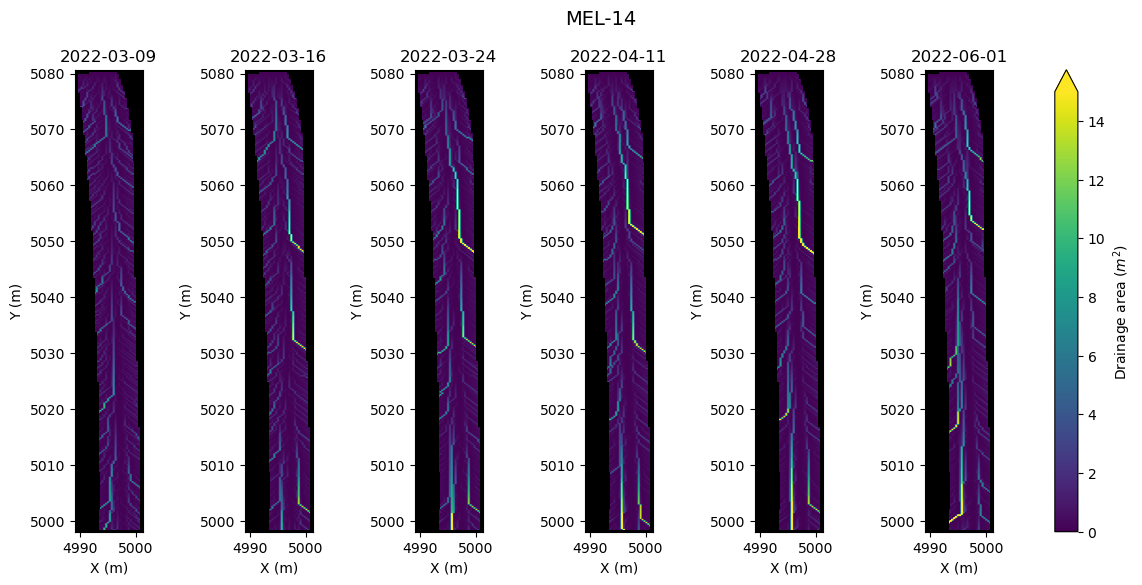

In [16]:
# extent = k13_wsyr1[0].rio.bounds()

# fig0, ax = plt.subplots(1, 4, figsize=(12,4))
# fig0.suptitle('KID-13 WSYR1', x=0.6)
# for i in range(len(k13_wsyr1_dem_files)):
#     m0 = ax[i].imshow(k13_wsyr1[i], cmap = 'summer', vmin=0, vmax=5, extent=k13_wsyr1[i].rio.bounds())
#     ax[i].set_title('t=%i' %i)
#     fig0.colorbar(m0, label='Drainage area ($m^2$)', extend='max', ax=ax[i])
#     ax[i].set_facecolor('k')
#     # ax[i].set_xticks(())
#     # ax[i].set_yticks(());

# fig1, ax = plt.subplots(1, 3, figsize=(9,4))
# fig1.suptitle('KID-13 DSYR1', x=0.6)
# for i in range(len(k13_dsyr1_dem_files)):
#     m1 = ax[i].imshow(k13_dsyr1[i], cmap = 'summer', vmin=0, vmax=5, extent=k13_dsyr1[i].rio.bounds())
#     ax[i].set_title('t=%i' %i)
#     fig1.colorbar(m1, label='Drainage area ($m^2$)', extend='max', ax=ax[i])
#     ax[i].set_facecolor('k')
#     # ax[i].set_xticks(())
#     # ax[i].set_yticks(());

# fig2, ax = plt.subplots(1, 4, figsize=(12,4))
# fig2.suptitle('KID-13 WSYR2', x=0.6)
# for i in range(len(k13_wsyr2_dem_files)):
#     m2 = ax[i].imshow(k13_wsyr2[i], cmap = 'summer', vmin=0, vmax=5, extent=k13_wsyr2[i].rio.bounds())
#     ax[i].set_title('t=%i' %i)
#     fig2.colorbar(m2, label='Drainage area ($m^2$)', extend='max', ax=ax[i])
#     ax[i].set_facecolor('k')
#     # ax[i].set_xticks(())
#     # ax[i].set_yticks(());



# fig3, ax = plt.subplots(1, 2, figsize=(6,4))
# fig3.suptitle('MEL-14 WSYR1', x=0.6)
# for i in range(len(m14_wsyr1_dem_files)):
#     m3 = ax[i].imshow(m14_wsyr1[i], cmap = 'summer', vmin=0, vmax=5, extent=m14_wsyr1[i].rio.bounds())
#     ax[i].set_title('t=%i' %i)
#     fig3.colorbar(m3, label='Drainage area ($m^2$)', extend='max', ax=ax[i])
#     ax[i].set_facecolor('k')
#     # ax[i].set_xticks(())
#     # ax[i].set_yticks(());

# fig4, ax = plt.subplots(1, 2, figsize=(6,4))
# fig4.suptitle('MEL-14 DSYR1', x=0.6)
# for i in range(len(m14_dsyr1_dem_files)):
#     m4 = ax[i].imshow(m14_dsyr1[i], cmap = 'summer', vmin=0, vmax=5, extent=m14_dsyr1[i].rio.bounds())
#     ax[i].set_title('t=%i' %i)
#     fig4.colorbar(m4, label='Drainage area ($m^2$)', extend='max', ax=ax[i])
#     ax[i].set_facecolor('k')
#     # ax[i].set_xticks(())
#     # ax[i].set_yticks(());

# fig5, ax = plt.subplots(1, 6, figsize=(18,4))
# fig5.suptitle('MEL-14 WSYR2', x=0.55)
# for i in range(len(m14_wsyr2_dem_files)):
#     m5 = ax[i].imshow(m14_wsyr2[i], cmap = 'summer', vmin=0, vmax=5, extent=m14_wsyr2[i].rio.bounds())
#     ax[i].set_title('t=%i' %i)
#     fig5.colorbar(m5, label='Drainage area ($m^2$)', extend='max', ax=ax[i])
#     ax[i].set_facecolor('k')
#     # ax[i].set_xticks(())
#     # ax[i].set_yticks(());

fig6, ax = plt.subplots(1, 6, figsize=(16,6))
fig6.suptitle('MEL-14', fontsize=14)
m6 = ax[0].imshow(m14_wsyr2_map[0], cmap = 'viridis', vmin=0, vmax=15)
fig6.colorbar(m6, label='Drainage area ($m^2$)', extend='max', ax=ax) 

for i in range(len(m14_wsyr2_map_files)):
    ax[i].imshow(m14_wsyr2_map[i], cmap = 'viridis', vmin=0, vmax=15, extent=m14_wsyr2_map[i].rio.bounds())
    ax[i].set_title('%s' %date[i], fontsize=12)
    ax[i].set(facecolor='k',xlabel='X (m)',ylabel='Y (m)')


In [17]:
t_k13_wsyr1 = [0, 3, 5, 6]
cm_norm_k13_wsyr1 = np.zeros(len(k13_wsyr1_dem_files))
cm_wa_k13_wsyr1 = np.zeros(len(k13_wsyr1_dem_files))
for i in range(len(k13_wsyr1_dem_files)):
    cm_norm_k13_wsyr1[i] = np.sum(k13_wsyr1[i]['y']*np.sum(~np.isnan(k13_wsyr1[i]), axis =1))/np.sum(~np.isnan(k13_wsyr1[i]))
    cm_wa_k13_wsyr1[i] = np.sum(k13_wsyr1[i]['y']*np.sum(k13_wsyr1[i], axis=1))/np.sum(k13_wsyr1[i])

t_k13_dsyr1 = [0, 2.5, 3.5]
cm_norm_k13_dsyr1 = np.zeros(len(k13_dsyr1_dem_files))
cm_wa_k13_dsyr1 = np.zeros(len(k13_dsyr1_dem_files))
for i in range(len(k13_dsyr1_dem_files)):
    cm_norm_k13_dsyr1[i] = np.sum(k13_dsyr1[i]['y']*np.sum(~np.isnan(k13_dsyr1[i]), axis =1))/np.sum(~np.isnan(k13_dsyr1[i]))
    cm_wa_k13_dsyr1[i] = np.sum(k13_dsyr1[i]['y']*np.sum(k13_dsyr1[i], axis=1))/np.sum(k13_dsyr1[i])

t_k13_wsyr2 = [0,4,7,8]
cm_norm_k13_wsyr2 = np.zeros(len(k13_wsyr2_dem_files))
cm_wa_k13_wsyr2 = np.zeros(len(k13_wsyr2_dem_files))
for i in range(len(k13_wsyr2_dem_files)):
    cm_norm_k13_wsyr2[i] = np.sum(k13_wsyr2[i]['y']*np.sum(~np.isnan(k13_wsyr2[i]), axis =1))/np.sum(~np.isnan(k13_wsyr2[i]))
    cm_wa_k13_wsyr2[i] = np.sum(k13_wsyr2[i]['y']*np.sum(k13_wsyr2[i], axis=1))/np.sum(k13_wsyr2[i])

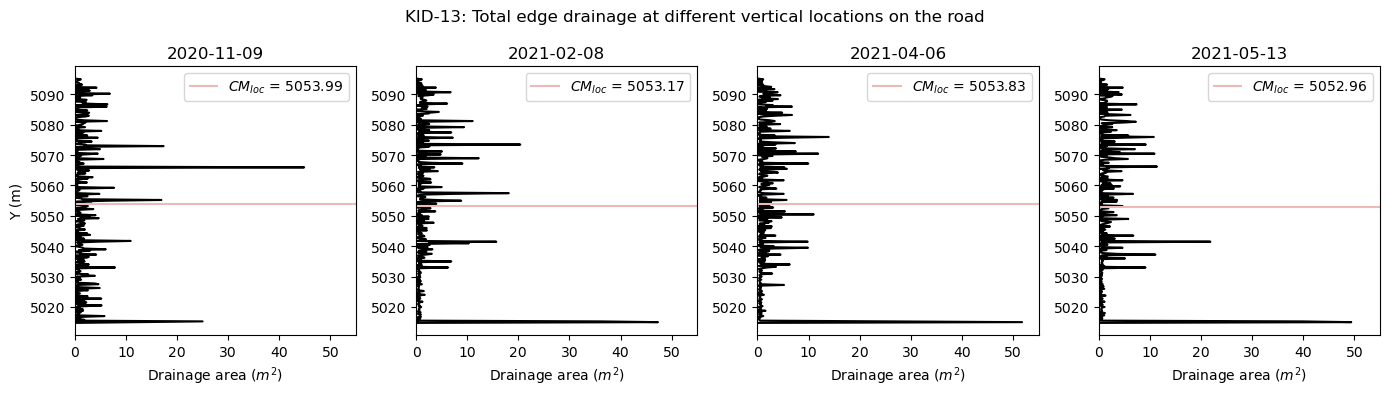

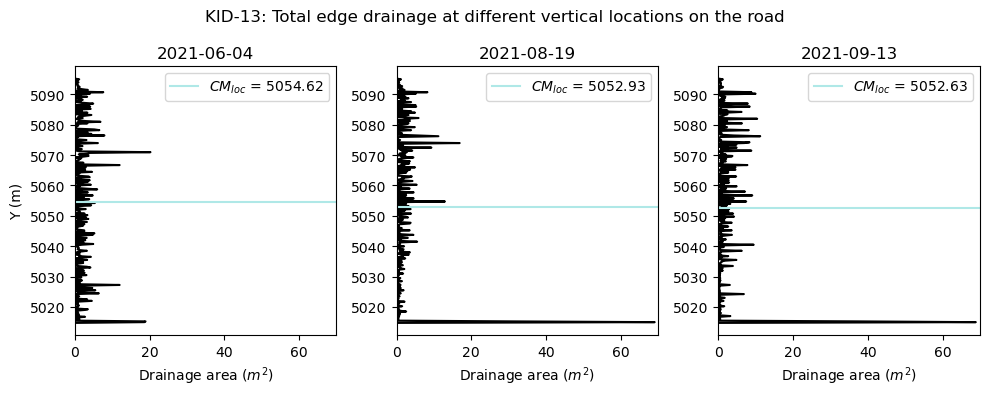

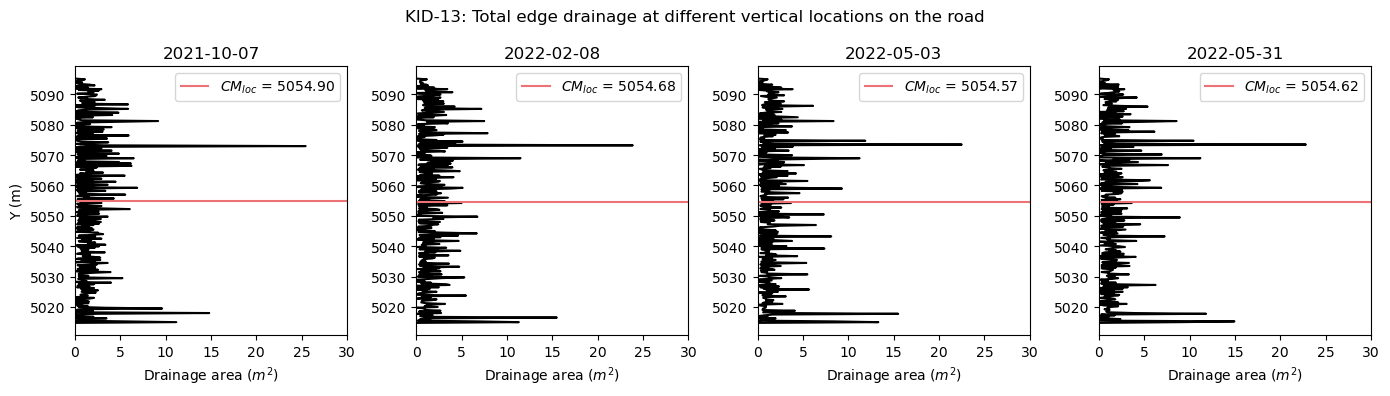

In [18]:
#WSYR1
fig0, ax = plt.subplots(1, 4, figsize=(14,4), layout='tight')
fig0.suptitle('KID-13: Total edge drainage at different vertical locations on the road', x=0.5)
for i in range(len(k13_wsyr1_dem_files)):
    ax[i].plot(np.sum(k13_wsyr1[i], axis=1), k13_wsyr1[i]['y'], color='k')
    ax[i].plot([0,56], [cm_wa_k13_wsyr1[i],cm_wa_k13_wsyr1[i]], color='#ECBAB8',label='$CM_{loc}$ = %0.2f' %cm_wa_k13_wsyr1[i])
    ax[i].set_title('%s' %date_k13_wsyr1[i], fontsize=12)
    ax[0].set_ylabel('Y (m)')
    ax[i].set_xlim(0,55)
    ax[i].set_xlabel('Drainage area ($m^2$)')
    ax[i].legend()


#DSYR1
fig0, ax = plt.subplots(1, 3, figsize=(10,4), layout='tight')
fig0.suptitle('KID-13: Total edge drainage at different vertical locations on the road', x=0.5)
for i in range(len(k13_dsyr1_dem_files)):
    ax[i].plot(np.sum(k13_dsyr1[i], axis=1), k13_dsyr1[i]['y'], color='k')
    ax[i].plot([0,75], [cm_wa_k13_dsyr1[i],cm_wa_k13_dsyr1[i]], color='#AFE8E7',label='$CM_{loc}$ = %0.2f' %cm_wa_k13_dsyr1[i])
    ax[i].set_title('%s' %date_k13_dsyr1[i], fontsize=12)
    ax[0].set_ylabel('Y (m)')
    ax[i].set_xlim(0,70)
    ax[i].set_xlabel('Drainage area ($m^2$)')
    ax[i].legend()

#WSYR2
fig0, ax = plt.subplots(1, 4, figsize=(14,4), layout='tight')
fig0.suptitle('KID-13: Total edge drainage at different vertical locations on the road', x=0.5)
for i in range(len(k13_wsyr2_dem_files)):
    ax[i].plot(np.sum(k13_wsyr2[i], axis=1), k13_wsyr2[i]['y'], color='k')
    ax[i].plot([0,50], [cm_wa_k13_wsyr2[i],cm_wa_k13_wsyr2[i]], color='#ED7275', label='$CM_{loc}$ = %0.2f' %cm_wa_k13_wsyr2[i])
    ax[i].set_title('%s' %date_k13_wsyr2[i], fontsize=12)
    ax[0].set_ylabel('Y (m)')
    ax[i].set_xlim(0,30)
    ax[i].set_xlabel('Drainage area ($m^2$)')
    ax[i].legend()

In [19]:
t_m14_wsyr1 = [0, 2.5]
cm_norm_m14_wsyr1 = np.zeros(len(m14_wsyr1_dem_files))
cm_wa_m14_wsyr1 = np.zeros(len(m14_wsyr1_dem_files))
for i in range(len(m14_wsyr1_dem_files)):
    cm_norm_m14_wsyr1[i] = np.sum(m14_wsyr1[i]['y']*np.sum(~np.isnan(m14_wsyr1[i]), axis =1))/np.sum(~np.isnan(m14_wsyr1[i]))
    cm_wa_m14_wsyr1[i] = np.sum(m14_wsyr1[i]['y']*np.sum(m14_wsyr1[i], axis=1))/np.sum(m14_wsyr1[i])

t_m14_dsyr1 = [0, 3.5]
cm_norm_m14_dsyr1 = np.zeros(len(m14_dsyr1_dem_files))
cm_wa_m14_dsyr1 = np.zeros(len(m14_dsyr1_dem_files))
for i in range(len(m14_dsyr1_dem_files)):
    cm_norm_m14_dsyr1[i] = np.sum(m14_dsyr1[i]['y']*np.sum(~np.isnan(m14_dsyr1[i]), axis =1))/np.sum(~np.isnan(m14_dsyr1[i]))
    cm_wa_m14_dsyr1[i] = np.sum(m14_dsyr1[i]['y']*np.sum(m14_dsyr1[i], axis=1))/np.sum(m14_dsyr1[i])

t_m14_wsyr2 = [0,0.25,0.5,1,1.75,3]
cm_norm_m14_wsyr2 = np.zeros(len(m14_wsyr2_dem_files))
cm_wa_m14_wsyr2 = np.zeros(len(m14_wsyr2_dem_files))
for i in range(len(m14_wsyr2_dem_files)):
    cm_norm_m14_wsyr2[i] = np.sum(m14_wsyr2[i]['y']*np.sum(~np.isnan(m14_wsyr2[i]), axis =1))/np.sum(~np.isnan(m14_wsyr2[i]))
    cm_wa_m14_wsyr2[i] = np.sum(m14_wsyr2[i]['y']*np.sum(m14_wsyr2[i], axis=1))/np.sum(m14_wsyr2[i])

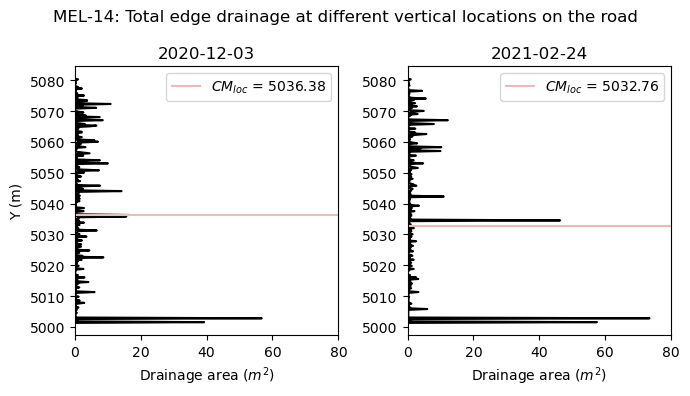

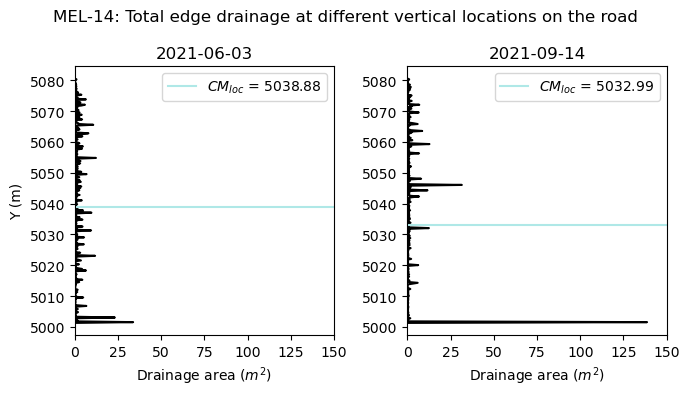

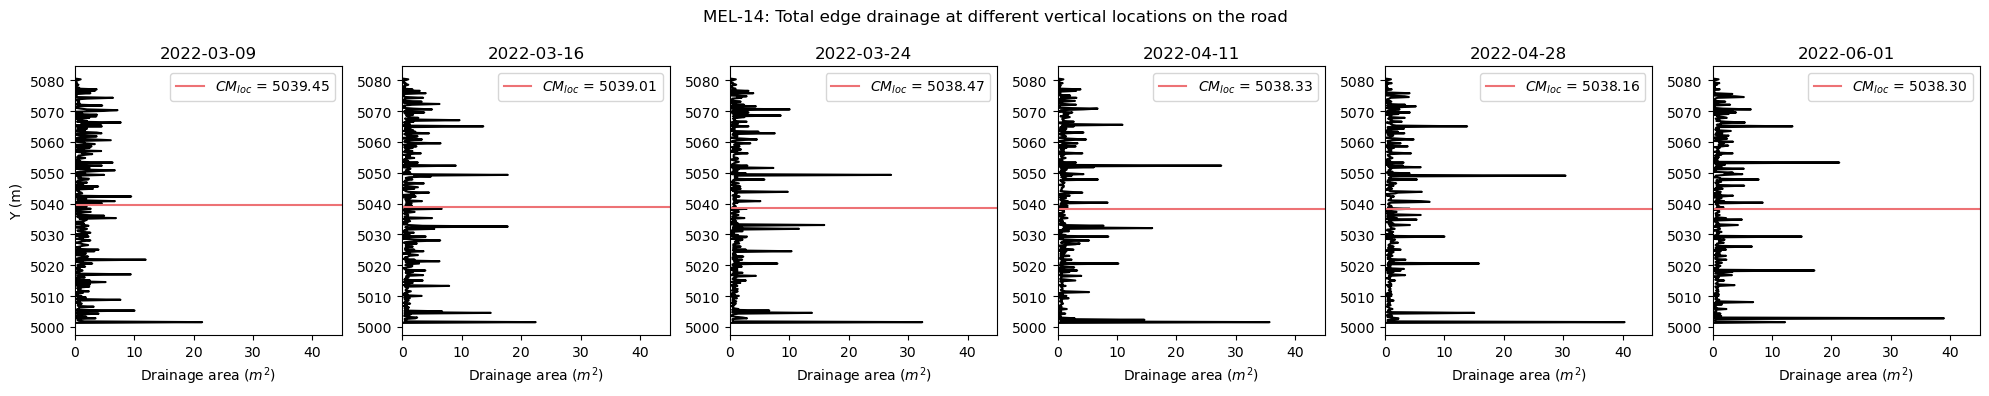

In [20]:
#WSYR1
fig0, ax = plt.subplots(1, 2, figsize=(7,4), layout='tight')
fig0.suptitle('MEL-14: Total edge drainage at different vertical locations on the road', x=0.5)
for i in range(len(m14_wsyr1_dem_files)):
    ax[i].plot(np.sum(m14_wsyr1[i], axis=1), m14_wsyr1[i]['y'], color='k')
    ax[i].plot([0,85], [cm_wa_m14_wsyr1[i],cm_wa_m14_wsyr1[i]], color='#ECBAB8',label='$CM_{loc}$ = %0.2f' %cm_wa_m14_wsyr1[i])
    ax[i].set_title('%s' %date_m14_wsyr1[i], fontsize=12)
    ax[0].set_ylabel('Y (m)')
    ax[i].set_xlim(0,80)
    ax[i].set_xlabel('Drainage area ($m^2$)')
    ax[i].legend()


#DSYR1
fig0, ax = plt.subplots(1, 2, figsize=(7,4), layout='tight')
fig0.suptitle('MEL-14: Total edge drainage at different vertical locations on the road', x=0.5)
for i in range(len(m14_dsyr1_dem_files)):
    ax[i].plot(np.sum(m14_dsyr1[i], axis=1), m14_dsyr1[i]['y'], color='k')
    ax[i].plot([0,155], [cm_wa_m14_dsyr1[i],cm_wa_m14_dsyr1[i]], color='#AFE8E7',label='$CM_{loc}$ = %0.2f' %cm_wa_m14_dsyr1[i])
    ax[i].set_title('%s' %date_m14_dsyr1[i], fontsize=12)
    ax[0].set_ylabel('Y (m)')
    ax[i].set_xlim(0,150)
    ax[i].set_xlabel('Drainage area ($m^2$)')
    ax[i].legend()

#WSYR2
fig0, ax = plt.subplots(1, 6, figsize=(20,4), layout='tight')
fig0.suptitle('MEL-14: Total edge drainage at different vertical locations on the road', x=0.5)
for i in range(len(m14_wsyr2_dem_files)):
    ax[i].plot(np.sum(m14_wsyr2[i], axis=1), m14_wsyr2[i]['y'], color='k')
    ax[i].plot([0,50], [cm_wa_m14_wsyr2[i],cm_wa_m14_wsyr2[i]], color='#ED7275', label='$CM_{loc}$ = %0.2f' %cm_wa_m14_wsyr2[i])
    ax[i].set_title('%s' %date_m14_wsyr2[i], fontsize=12)
    ax[0].set_ylabel('Y (m)')
    ax[i].set_xlim(0,45)
    ax[i].set_xlabel('Drainage area ($m^2$)')
    ax[i].legend()

In [21]:
cm_norm_k13_wsyr1 = (cm_norm_k13_wsyr1-min(k13_wsyr1[3]['y'].values))/(max(k13_wsyr1[3]['y'].values)-min(k13_wsyr1[3]['y'].values))
cm_wa_k13_wsyr1 = (cm_wa_k13_wsyr1-min(k13_wsyr1[3]['y'].values))/(max(k13_wsyr1[3]['y'].values)-min(k13_wsyr1[3]['y'].values))
cm_norm_k13_dsyr1 = (cm_norm_k13_dsyr1-min(k13_dsyr1[2]['y'].values))/(max(k13_dsyr1[2]['y'].values)-min(k13_dsyr1[2]['y'].values))
cm_wa_k13_dsyr1 = (cm_wa_k13_dsyr1-min(k13_dsyr1[2]['y'].values))/(max(k13_dsyr1[2]['y'].values)-min(k13_dsyr1[2]['y'].values))
cm_norm_k13_wsyr2 = (cm_norm_k13_wsyr2-min(k13_wsyr2[3]['y'].values))/(max(k13_wsyr2[3]['y'].values)-min(k13_wsyr2[3]['y'].values))
cm_wa_k13_wsyr2 = (cm_wa_k13_wsyr2-min(k13_wsyr2[3]['y'].values))/(max(k13_wsyr2[3]['y'].values)-min(k13_wsyr2[3]['y'].values))

tmax_k13_wsyr1 = np.linspace(-0.25,8.25, 4)

In [22]:
cm_norm_m14_wsyr1 = (cm_norm_m14_wsyr1-min(m14_wsyr2[i]['y'].values))/(max(m14_wsyr2[i]['y'].values)-min(m14_wsyr2[i]['y'].values))
cm_wa_m14_wsyr1 = (cm_wa_m14_wsyr1-min(m14_wsyr2[i]['y'].values))/(max(m14_wsyr2[i]['y'].values)-min(m14_wsyr2[i]['y'].values))
cm_norm_m14_dsyr1 = (cm_norm_m14_dsyr1-min(m14_wsyr2[i]['y'].values))/(max(m14_wsyr2[i]['y'].values)-min(m14_wsyr2[i]['y'].values))
cm_wa_m14_dsyr1 = (cm_wa_m14_dsyr1-min(m14_wsyr2[i]['y'].values))/(max(m14_wsyr2[i]['y'].values)-min(m14_wsyr2[i]['y'].values))
cm_norm_m14_wsyr2 = (cm_norm_m14_wsyr2-min(m14_wsyr2[i]['y'].values))/(max(m14_wsyr2[i]['y'].values)-min(m14_wsyr2[i]['y'].values))
cm_wa_m14_wsyr2 = (cm_wa_m14_wsyr2-min(m14_wsyr2[i]['y'].values))/(max(m14_wsyr2[i]['y'].values)-min(m14_wsyr2[i]['y'].values))

tmax_m14_wsyr1 = np.linspace(-0.25,3.75, 2)

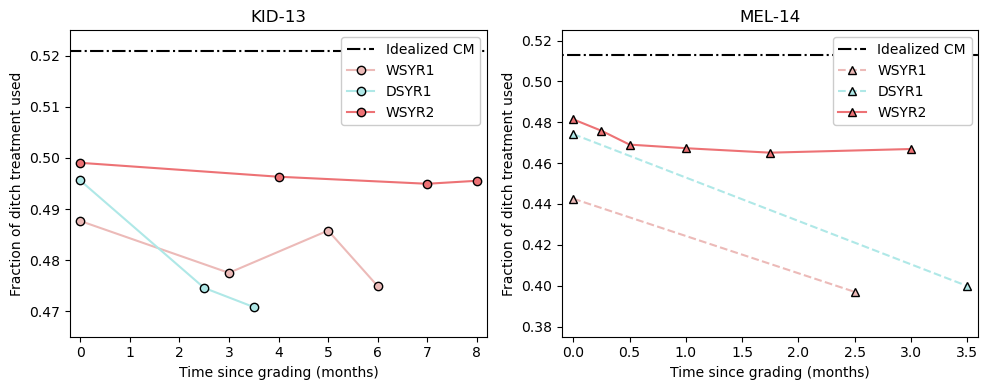

In [23]:
fig, ax =plt.subplots(1,2, figsize=(10,4), layout='tight')

ax[0].plot(tmax_k13_wsyr1, cm_norm_k13_wsyr1, '-.', color='k', label='Idealized CM')
ax[0].plot(t_k13_wsyr1, cm_wa_k13_wsyr1, 'o-', color='#ECBAB8', markeredgecolor='k', label='WSYR1')
ax[0].plot(t_k13_dsyr1, cm_wa_k13_dsyr1, 'o-', color='#AFE8E7', markeredgecolor='k', label='DSYR1')
ax[0].plot(t_k13_wsyr2, cm_wa_k13_wsyr2, 'o-', color='#ED7275', markeredgecolor='k', label='WSYR2')
ax[0].set(xlim=(-0.2,8.2), ylim=(0.465,0.525), ylabel=('Fraction of ditch treatment used'), title='KID-13')

tmax_m14_wsyr1 = np.linspace(-0.25,3.75, 2)
ax[1].plot(tmax_m14_wsyr1, cm_norm_m14_wsyr1, '-.', color='k', label='Idealized CM')
ax[1].plot(t_m14_wsyr1, cm_wa_m14_wsyr1, '^--', color='#ECBAB8', markeredgecolor='k', label='WSYR1')
ax[1].plot(t_m14_dsyr1, cm_wa_m14_dsyr1, '^--', color='#AFE8E7', markeredgecolor='k', label='DSYR1')
ax[1].plot(t_m14_wsyr2, cm_wa_m14_wsyr2, '^-', color='#ED7275', markeredgecolor='k', label='WSYR2')
ax[1].set(xlim=(-0.1,3.6), ylim=(0.375,0.525), ylabel=('Fraction of ditch treatment used'), title='MEL-14')

for ax in ax.flat:
    ax.set(xlabel='Time since grading (months)')
    ax.legend(loc='upper right', framealpha=1)
plt.show();

In [24]:
t_k13_wsyr1 = [0, 3, 5, 6]
da_wa_k13_wsyr1 = np.zeros(len(k13_wsyr1_dem_files))
for i in range(len(k13_wsyr1_dem_files)):
    da_wa_k13_wsyr1[i] = np.sum(k13_wsyr1[i][-3]+k13_wsyr1[i][-2])

t_k13_dsyr1 = [0, 2.5, 3.5]
da_wa_k13_dsyr1 = np.zeros(len(k13_dsyr1_dem_files))
for i in range(len(k13_dsyr1_dem_files)):
    da_wa_k13_dsyr1[i] = np.sum(k13_dsyr1[i][-3]+k13_dsyr1[i][-2])

t_k13_wsyr2 = [0,4,7,8]
da_wa_k13_wsyr2 = np.zeros(len(k13_wsyr2_dem_files))
for i in range(len(k13_wsyr2_dem_files)):
    da_wa_k13_wsyr2[i] = np.sum(k13_wsyr2[i][-3]+k13_wsyr2[i][-2])

In [25]:
t_m14_wsyr1 = [0, 2.5]
da_wa_m14_wsyr1 = np.zeros(len(m14_wsyr1_dem_files))
for i in range(len(m14_wsyr1_dem_files)):
    da_wa_m14_wsyr1[i] = np.sum(m14_wsyr1[i][-7]+m14_wsyr1[i][-2])

t_m14_dsyr1 = [0, 3.5]
da_wa_m14_dsyr1 = np.zeros(len(m14_dsyr1_dem_files))
for i in range(len(m14_dsyr1_dem_files)):
    da_wa_m14_dsyr1[i] = np.sum(m14_dsyr1[i][-7]+m14_dsyr1[i][-2])

t_m14_wsyr2 = [0,0.25,0.5,1,1.75,3]
da_wa_m14_wsyr2 = np.zeros(len(m14_wsyr2_dem_files))
for i in range(len(m14_wsyr2_dem_files)):
    da_wa_m14_wsyr2[i] = np.sum(m14_wsyr2[i][-7]+m14_wsyr2[i][-2])

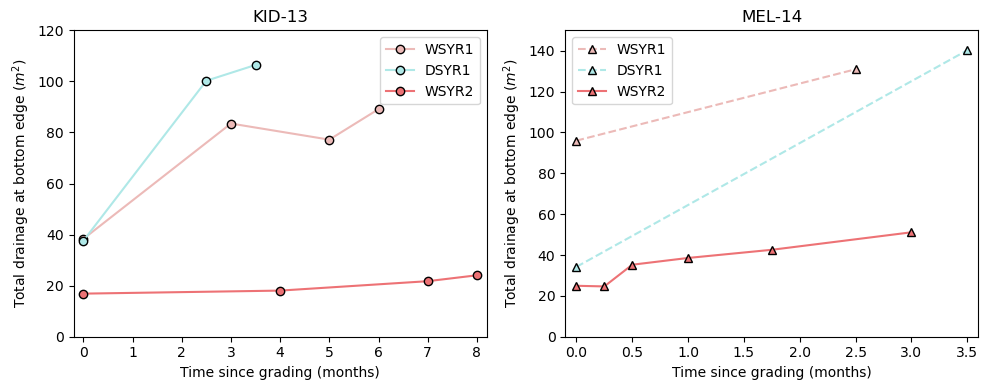

In [26]:
fig, ax =plt.subplots(1,2, figsize=(10,4), layout='tight')

ax[0].plot(t_k13_wsyr1, da_wa_k13_wsyr1, 'o-', color='#ECBAB8', markeredgecolor='k', label='WSYR1')
ax[0].plot(t_k13_dsyr1, da_wa_k13_dsyr1, 'o-', color='#AFE8E7', markeredgecolor='k', label='DSYR1')
ax[0].plot(t_k13_wsyr2, da_wa_k13_wsyr2, 'o-', color='#ED7275', markeredgecolor='k', label='WSYR2')
ax[0].set(ylabel=r'Total drainage at bottom edge ($m^2$)', xlim=(-0.2,8.2), ylim=(0,120), title='KID-13')

ax[1].plot(t_m14_wsyr1, da_wa_m14_wsyr1, '^--', color='#ECBAB8', markeredgecolor='k', label='WSYR1')
ax[1].plot(t_m14_dsyr1, da_wa_m14_dsyr1, '^--', color='#AFE8E7', markeredgecolor='k', label='DSYR1')
ax[1].plot(t_m14_wsyr2, da_wa_m14_wsyr2, '^-', color='#ED7275', markeredgecolor='k', label='WSYR2')
ax[1].set(ylabel=r'Total drainage at bottom edge ($m^2$)', xlim=(-0.1,3.6), ylim=(0,150), title='MEL-14')

for ax in ax.flat:
    ax.set(xlabel='Time since grading (months)')
    ax.legend()
plt.show();